In [1]:
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# read the data
iris=load_iris()
# create X features and y response
X= iris.data
y= iris.target


In [3]:
# 10 for cross validation with k=5 for KNN (the n_neighbors parameter)
knn= KNeighborsClassifier(n_neighbors=5)

score_knn=cross_val_score(knn, X,y,cv=10, scoring='accuracy')
score_knn


array([1.        , 0.93333333, 1.        , 1.        , 0.86666667,
       0.93333333, 0.93333333, 1.        , 1.        , 1.        ])

In [5]:
# print for average score
print(score_knn.mean())


0.9666666666666668


In [6]:
# search for optimal value for k for KNN
k_range= list(range(1,31))
k_score=[]

for k in k_range:
    knn= KNeighborsClassifier(n_neighbors=k)
    scores=cross_val_score(knn,X,y,cv=10,scoring='accuracy')
    k_score.append(scores.mean())
    
print(k_score)


[0.96, 0.9533333333333334, 0.9666666666666666, 0.9666666666666666, 0.9666666666666668, 0.9666666666666668, 0.9666666666666668, 0.9666666666666668, 0.9733333333333334, 0.9666666666666668, 0.9666666666666668, 0.9733333333333334, 0.9800000000000001, 0.9733333333333334, 0.9733333333333334, 0.9733333333333334, 0.9733333333333334, 0.9800000000000001, 0.9733333333333334, 0.9800000000000001, 0.9666666666666666, 0.9666666666666666, 0.9733333333333334, 0.96, 0.9666666666666666, 0.96, 0.9666666666666666, 0.9533333333333334, 0.9533333333333334, 0.9533333333333334]


Text(0, 0.5, 'Cross-validated accuracy')

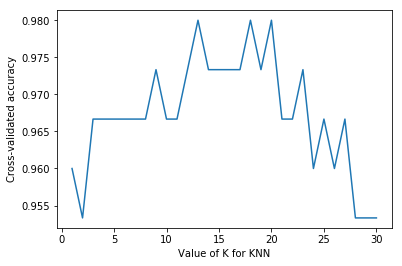

In [7]:
# plot the value of K for KNN (x-axis) Vs the cross-validated score (y-axis)
plt.plot(k_range,k_score)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-validated accuracy')



In [8]:
from sklearn.model_selection import GridSearchCV

In [9]:
# define the parameter values that should be searched
K_range= list(range(1,31))
print(k_range)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]


In [10]:
# create a parameter grid : map the parameter names to the values that should be searched.
param_grid= dict(n_neighbors=k_range)
print(param_grid)


{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]}


In [11]:
# instantiate the grid
grid= GridSearchCV(knn,param_grid,cv=10,scoring='accuracy',return_train_score=False)

In [12]:
grid.fit(X,y)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=30, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
       scoring='accuracy', verbose=0)

In [13]:
# view the results as a pandas dataframe
import pandas as pd
pd.DataFrame(grid.cv_results_)[['mean_test_score','std_test_score','params']]


,mean_test_score,std_test_score,params
0,0.960000,0.053333,{'n_neighbors': 1}
1,0.953333,0.052068,{'n_neighbors': 2}
2,0.966667,0.044721,{'n_neighbors': 3}
3,0.966667,0.044721,{'n_neighbors': 4}
4,0.966667,0.044721,{'n_neighbors': 5}
5,0.966667,0.044721,{'n_neighbors': 6}
6,0.966667,0.044721,{'n_neighbors': 7}
7,0.966667,0.044721,{'n_neighbors': 8}
8,0.973333,0.032660,{'n_neighbors': 9}
9,0.966667,0.044721,{'n_neighbors': 10}


In [15]:
print(grid.cv_results_['params'][0])
print(grid.cv_results_['mean_test_score'][0])


{'n_neighbors': 1}
0.96


In [18]:
# print the array of mean test scores only
grid_mean_scores= grid.cv_results_['mean_test_score']
print(grid_mean_scores)

[0.96       0.95333333 0.96666667 0.96666667 0.96666667 0.96666667
 0.96666667 0.96666667 0.97333333 0.96666667 0.96666667 0.97333333
 0.98       0.97333333 0.97333333 0.97333333 0.97333333 0.98
 0.97333333 0.98       0.96666667 0.96666667 0.97333333 0.96
 0.96666667 0.96       0.96666667 0.95333333 0.95333333 0.95333333]


Text(0, 0.5, 'Cross-Val-accuracy')

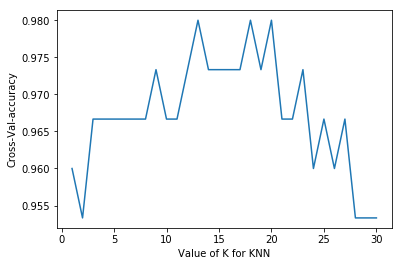

In [19]:
# plot the results 
plt.plot(k_range,grid_mean_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Val-accuracy')



In [20]:
# examine the best model 
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

0.98
{'n_neighbors': 13}
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=13, p=2,
           weights='uniform')


In [ ]:
Using best parameter to make predictions 

In [23]:
# train your model using all your data and the best known parameters
knn= KNeighborsClassifier(n_neighbors=13,weights='uniform')
knn.fit(X,y)

# make prediction with sample data
knn.predict([[3,5,4,2]])


array([1])